In [5]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# Model sekwencyjny, dwuwarstowy (32 neurony na warstwę)
model1 = models.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu')
])

In [84]:
# Wygenerowanie dwóch skupisk punktów na osi dwuwymiaowej
mean1 = [0, 3]
mean2 = [3, 0]
cov = [[1, .5], [.5, 1]]  # diagonal covariance
sample_counts = 2000

class_A = np.random.multivariate_normal(mean=mean1, cov=cov, size=sample_counts)
class_B = np.random.multivariate_normal(mean=mean2, cov=cov, size=sample_counts)

In [85]:
class_A, class_B

(array([[-0.03573631,  3.949787  ],
        [-0.47655882,  3.31453282],
        [ 0.09364788,  3.39031837],
        ...,
        [-0.5137416 ,  4.96429005],
        [ 0.14350895,  1.75208343],
        [ 0.31532829,  4.18075002]]),
 array([[ 2.92174384,  0.83028437],
        [ 3.85252565, -0.19867592],
        [ 5.17636056,  1.17747847],
        ...,
        [ 1.96399749,  0.00628354],
        [ 5.0928451 , -0.78863852],
        [ 2.54486931,  1.0117017 ]]))

In [86]:
inputs = np.vstack((class_A,class_B)).astype('float32')
inputs

array([[-0.03573631,  3.949787  ],
       [-0.47655883,  3.3145328 ],
       [ 0.09364788,  3.3903184 ],
       ...,
       [ 1.9639975 ,  0.00628354],
       [ 5.092845  , -0.78863853],
       [ 2.5448694 ,  1.0117017 ]], dtype=float32)

In [87]:
targets = np.vstack((np.zeros((sample_counts,1), dtype = 'float32'), np.ones((sample_counts, 1), dtype = 'float32')))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

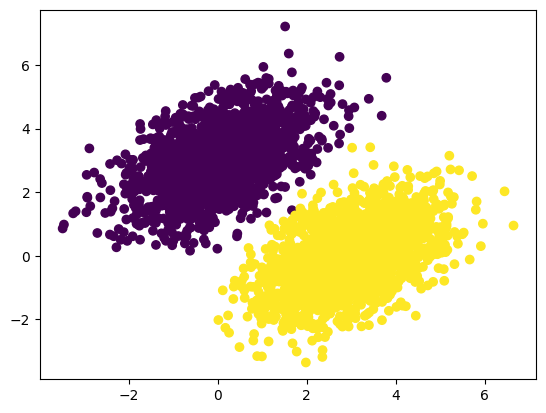

In [88]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets)
plt.show()

In [89]:
model1.compile(optimizer= "adam",
loss = "sparse_categorical_crossentropy",
metrics = ["accuracy"])

In [90]:
first_try = model1.fit(
    inputs,
    targets,
    epochs = 10,
    batch_size = 100
)

Epoch 1/10
40/40 [==============================] - 1s 5ms/step - loss: 10.3537 - accuracy: 7.5000e-04
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 4.0175 - accuracy: 0.4947
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.9908
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 0.9987
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9995
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9995
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0893 - accuracy: 0.9995
Epoch 8/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0884 - accuracy: 0.9995
Epoch 9/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0878 - accuracy: 0.9995
Epoch 10/10
40/40 [==============================] - 0s 4ms/step - loss: 0.0874 - accuracy: 0.9995


In [91]:
class_A_test = np.random.multivariate_normal(mean=mean1, cov=cov, size=100)
class_B_test = np.random.multivariate_normal(mean=mean2, cov=cov, size=100)

In [92]:
predictions = model1.evaluate(x = class_A_test, y = np.zeros((100,1), dtype = 'float32'))
predictions = model1.evaluate(x = class_B_test, y = np.ones((100,1), dtype = 'float32'))

4/4 [==============================] - 0s 4ms/step - loss: 8.4483e-06 - accuracy: 1.0000


In [93]:
predictions

[8.448324479104485e-06, 1.0]

In [94]:
# Wygenerowanie kolejnych dwóch skupisk punktów na osi dwuwymiaowej
mean3 = [-3, 0]
mean4 = [3, 3]
cov3 = [[1, -.5], [-.5, 1]]
cov4 = [[.5, 0], [0, .5]]
sample_counts = 2000

class_C = np.random.multivariate_normal(mean=mean3, cov=cov3, size=sample_counts)
class_D = np.random.multivariate_normal(mean=mean4, cov=cov4, size=sample_counts)

In [95]:
inputs = np.vstack((class_A, class_B, class_C, class_D)).astype('float32')
targets = np.vstack((np.zeros((sample_counts,1), dtype = 'float32'),
np.ones((sample_counts, 1), dtype = 'float32'),
2*np.ones((sample_counts, 1), dtype = 'float32'),
3*np.ones((sample_counts, 1), dtype = 'float32')))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [3.],
       [3.],
       [3.]], dtype=float32)

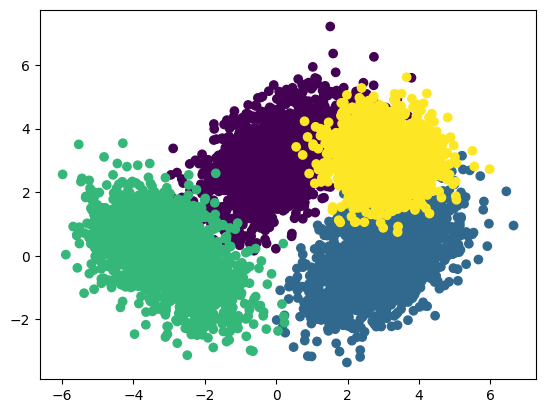

In [96]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets)
plt.show()

In [97]:
class_A_test = np.random.multivariate_normal(mean=mean1, cov=cov, size=100)
class_B_test = np.random.multivariate_normal(mean=mean2, cov=cov, size=100)
class_C_test = np.random.multivariate_normal(mean=mean3, cov=cov3, size=100)
class_D_test = np.random.multivariate_normal(mean=mean4, cov=cov4, size=100)

In [98]:
predictions = model1.evaluate(x = class_A_test, y = np.zeros((100,1), dtype = 'float32'))
predictions = model1.evaluate(x = class_B_test, y = np.ones((100,1), dtype = 'float32'))
predictions = model1.evaluate(x = class_C_test, y = 2*np.ones((100,1), dtype = 'float32'))
predictions = model1.evaluate(x = class_D_test, y = 3*np.ones((100,1), dtype = 'float32'))

4/4 [==============================] - 0s 4ms/step - loss: 14.8046 - accuracy: 0.0000e+00


In [99]:
# 2 inputs -> [8 hidden nodes] -> 4 outputs
model2 = models.Sequential([
    layers.Dense(8, input_dim = 2, activation = 'relu'),
    layers.Dense(4, activation = 'softmax')
])

In [101]:
model2.compile(optimizer= "adam",
loss = "sparse_categorical_crossentropy",
metrics = ["accuracy"])

In [102]:
first_try = model2.fit(
    inputs,
    targets,
    epochs = 10,
    batch_size = 100
)

Epoch 1/10
80/80 [==============================] - 1s 4ms/step - loss: 1.8724 - accuracy: 0.1039
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 1.2800 - accuracy: 0.3780
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.9312 - accuracy: 0.7240
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.7795
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.8749
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.9294
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.9503
Epoch 8/10
80/80 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.9570
Epoch 9/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.9596
Epoch 10/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9621


In [103]:
predictions = model2.evaluate(x = class_A_test, y = np.zeros((100,1), dtype = 'float32'))
predictions = model2.evaluate(x = class_B_test, y = np.ones((100,1), dtype = 'float32'))
predictions = model2.evaluate(x = class_C_test, y = 2*np.ones((100,1), dtype = 'float32'))
predictions = model2.evaluate(x = class_D_test, y = 3*np.ones((100,1), dtype = 'float32'))

4/4 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 1.0000
